<a href="https://colab.research.google.com/github/WinningHabits/lottery/blob/main/04_Monthly_and_Recent_Trends_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_excel('https://raw.githubusercontent.com/WinningHabits/lottery_dataset/main/lottery-toto_upto_08.23_revised_1.xlsx')


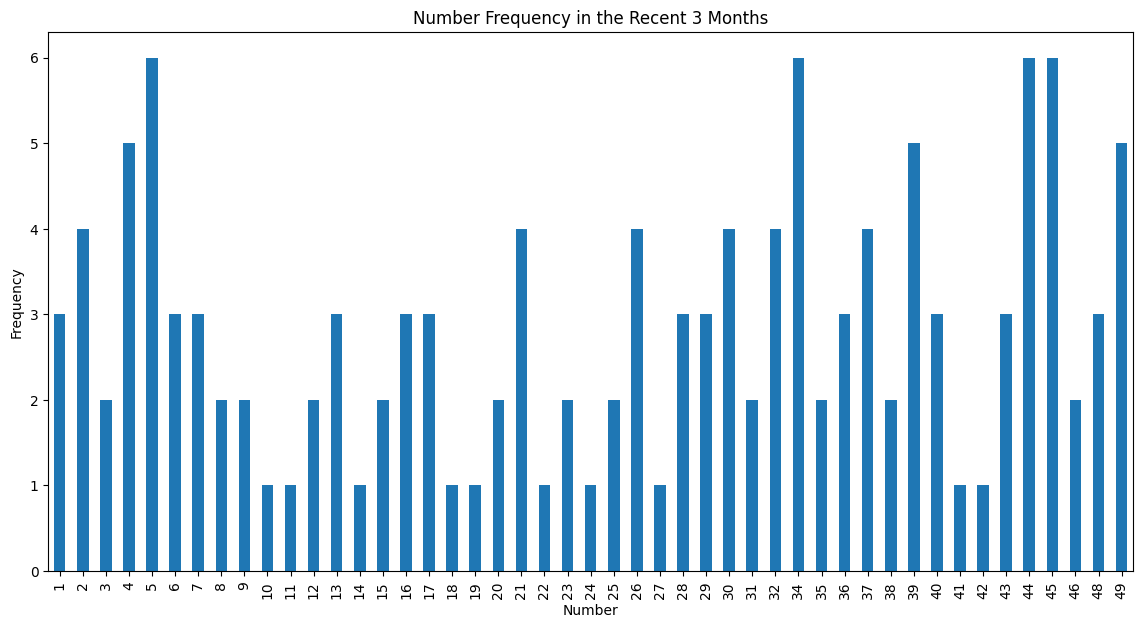

In [2]:
# Filter data for the last three months (adjust according to your dataset's timeframe)
recent_data = data[data['Date by Month'] >= '2023-06-01']

# Calculate frequency for each number in the recent dataset
recent_frequencies = recent_data.drop(columns=['Date by Month']).stack().value_counts().sort_index()

# Plot
plt.figure(figsize=(14, 7))
recent_frequencies.plot(kind='bar')
plt.title('Number Frequency in the Recent 3 Months')
plt.xlabel('Number')
plt.ylabel('Frequency')
plt.show()


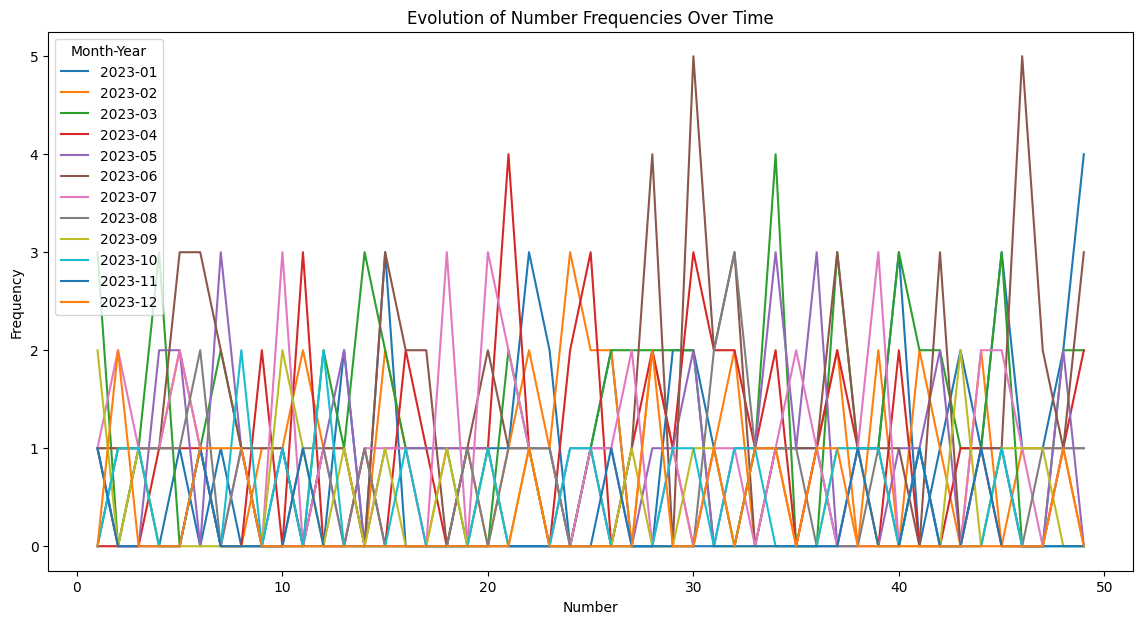

In [3]:
# Convert 'Date by Month' to a datetime format and extract month-year
data['Date by Month'] = pd.to_datetime(data['Date by Month'])
data['Month-Year'] = data['Date by Month'].dt.to_period('M')

# Calculate frequency for each number for each month
monthly_frequencies = data.groupby('Month-Year').apply(lambda x: x.drop(columns=['Date by Month', 'Month-Year']).stack().value_counts()).unstack().fillna(0).T

# Plot
monthly_frequencies.plot(figsize=(14, 7))
plt.title('Evolution of Number Frequencies Over Time')
plt.xlabel('Number')
plt.ylabel('Frequency')
plt.legend(title='Month-Year')
plt.show()


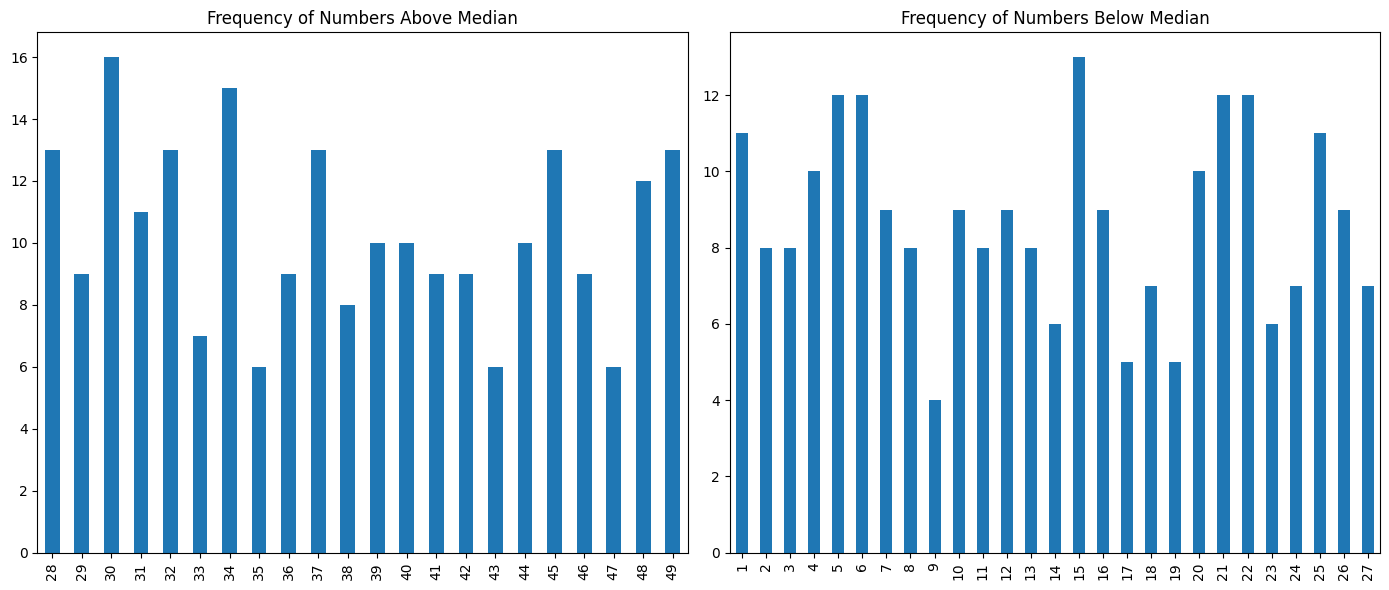

In [4]:
# Calculate median number
median_number = np.median(data.drop(columns=['Date by Month', 'Month-Year']).values)

# Split numbers into above and below median
above_median = data.drop(columns=['Date by Month', 'Month-Year']).stack().loc[lambda x: x > median_number]
below_median = data.drop(columns=['Date by Month', 'Month-Year']).stack().loc[lambda x: x <= median_number]

# Plot
fig, ax = plt.subplots(1, 2, figsize=(14, 6))
above_median.value_counts().sort_index().plot(kind='bar', ax=ax[0], title='Frequency of Numbers Above Median')
below_median.value_counts().sort_index().plot(kind='bar', ax=ax[1], title='Frequency of Numbers Below Median')
plt.tight_layout()
plt.show()
